<a href="https://colab.research.google.com/github/raffaelepojer/DeepLearningAssignment/blob/DL_luna/luna1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessing to the dataset (in the drive folder)

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

%cd /content/gdrive/MyDrive/dataset\ elisa

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/MyDrive/dataset elisa'
/content


## Start to importing the dataset into pytorch

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

import os
from torchvision.io import read_image
from torch.utils.data import DataLoader

## Add the two multicolor label (up and down) to the dataset

where all the color (up or down) are 1 (no color)

In [ ]:
import numpy as np

df = pd.read_csv('annotations_train.csv')
tmp = df.iloc[df.index[df['id'] == 474], 1:]

# print(tmp)
# print(df.columns.get_loc('upblack'))
# print(df.columns.get_loc('upgreen'))

#add the two new categories to the dataset labels

df = df.assign(upmulticolor=pd.Series(np.ones(len(df.index), dtype=int)))
df = df.assign(downmulticolor=pd.Series(np.ones(len(df.index), dtype=int)))

for x in range(len(df.index)):
  a = True
  for y in range(df.columns.get_loc('upblack'), df.columns.get_loc('upgreen')+1):
    if df.iloc[x, y] == 2:
      a = False
  if a:
    df.at[x, 'upmulticolor'] = 2
  
  a = True
  for y in range(df.columns.get_loc('downblack'), df.columns.get_loc('downbrown')+1):
    if df.iloc[x, y] == 2:
      a = False
  if a:
    df.at[x, 'downmulticolor'] = 2

# save the new dataset

df.to_csv('annotations_train_new.csv', index=False)


# print to check the upmulticolor 

# for x in range(len(df.index)):
#  if df.at[x, 'upmulticolor'] == 2:
#    print(df.iloc[x, 11:])

  


### Define the Dataset

init contains the "labels" of each sample in the training dataset. Traformation are not already defined

len return the lenght of the dataset

getitem return the images corresponind to the id given

In [ ]:
class ElyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

        self.imgs = os.listdir(img_dir)
        self.img_list = self.imgs

        self.imgs = [el for el in self.imgs if os.path.splitext(el)[1] == '.jpg']
        self.lb_ids = [int(el.split('_')[0]) for el in self.imgs]
        self.lb_cams = [int(el.split('_')[1][1]) for el in self.imgs]
        self.imgs = [os.path.join(img_dir, el) for el in self.imgs]

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        image = read_image(img_path)
        id = self.lb_ids[idx]

        # look for the images corresponding to the id
        label = torch.tensor(self.img_labels.iloc[self.img_labels.index[self.img_labels['id'] == self.lb_ids[idx]], 1:].values)

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, id, label

In [ ]:
training_data = ElyImageDataset('annotations_train_new.csv', 'train/')

## Show 4 sample in the dataset

In [ ]:
'''
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(len(training_data)):
    image, id, label = training_data[i]

    print(i, image.shape, id)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.imshow(image[0], cmap='gray')

    if i == 3:
        plt.show()
        break
'''

"\nimport matplotlib.pyplot as plt\n\nfig = plt.figure()\n\nfor i in range(len(training_data)):\n    image, id, label = training_data[i]\n\n    print(i, image.shape, id)\n\n    ax = plt.subplot(1, 4, i + 1)\n    plt.tight_layout()\n    ax.set_title('Sample #{}'.format(i))\n    ax.axis('off')\n\n    plt.imshow(image[0], cmap='gray')\n\n    if i == 3:\n        plt.show()\n        break\n"

## Create the label map with the new categories

In [ ]:
labels_map = {
    0: {
        1: 'young',
        2: 'teenager',
        3: 'adult',
        4: 'old'
    },
    1: {
        1: 'no backpack',
        2: 'yes backpack'
    },
    2: {
        1: 'no bag',
        2: 'yes bag'
    },
    3: {
        1: 'no handbag',
        2: 'yes handbag'
    },
    4: {
        1: 'dress',
        2: 'pants'
    },
    5: {
        1: 'long lower body clothing',
        2: 'short'
    },
    6: {
        1: 'long sleeve',
        2: 'short sleeve'
    },
    7: {
        1: 'short hair',
        2: 'long hair'
    },
    8: {
        1: 'no hat',
        2: 'yes hat'
    },
    9: {
        1: 'male',
        2: 'female'
    },
    10: {
        1: 'no upblack',
        2: 'yes upblcak'
    },
    11: {
        1: 'no upwhite',
        2: 'yes upwhite'
    },
    12: {
        1: 'no upred',
        2: 'yes upred'
    },
    13: {
        1: 'no uppurle',
        2: 'yes uppurle'
    },
    14: {
        1: 'no upyellow',
        2: 'yes upyellow'
    },
    15: {
        1: 'no upgray',
        2: 'yes upgray'
    },
    16: {
        1: 'no upblue',
        2: 'yes upblue'
    },
    17: {
        1: 'no upgreen',
        2: 'yes upgreen'
    },
    18: {
        1: 'no downblack',
        2: 'yes downblcak'
    },
    19: {
        1: 'no downwhite',
        2: 'yes downwhite'
    },
    20: {
        1: 'no downpink',
        2: 'yes downpink'
    },
    21: {
        1: 'no downpurple',
        2: 'yes downpurple'
    },
    22: {
        1: 'no downyellow',
        2: 'yes downyellow'
    },
    23: {
        1: 'no downgray',
        2: 'yes downgray'
    },
    24: {
        1: 'no downblue',
        2: 'yes downblue'
    },
    25: {
        1: 'no downgreen',
        2: 'yes downgreen'
    },
    26: {
        1: 'no downbrown',
        2: 'yes downbrown'
    },

    # the two new categories addes

    27: {
        1: 'no upmulti-color',
        2: 'yes upmulti-color'
    },
    28: {
        1: 'no downmulti-color',
        2: 'yes downmulti-color'
    }
}

Feature batch shape: torch.Size([64, 3, 128, 64])
Labels batch shape: torch.Size([64, 1, 29])


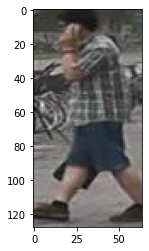

teenager
no backpack
no bag
yes handbag
pants
short
short sleeve
short hair
no hat
male
no upblack
no upwhite
no upred
no uppurle
no upyellow
no upgray
no upblue
no upgreen
no downblack
no downwhite
no downpink
no downpurple
no downyellow
no downgray
yes downblue
no downgreen
no downbrown
yes upmulti-color
no downmulti-color
Label: tensor([2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 2, 1])


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

train_features, train_ids, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.show()

for i in range(len(label)):
  print(labels_map[i][label[i].item()])

print(f"Label: {label}")


## With K-fold

Feature batch shape: torch.Size([10, 3, 128, 64])
Labels batch shape: torch.Size([10, 1, 29])


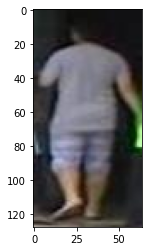

teenager
no backpack
no bag
no handbag
pants
short
short sleeve
short hair
no hat
male
no upblack
no upwhite
no upred
no uppurle
no upyellow
yes upgray
no upblue
no upgreen
no downblack
no downwhite
no downpink
no downpurple
no downyellow
no downgray
yes downblue
no downgreen
no downbrown
no upmulti-color
no downmulti-color
Feature batch shape: torch.Size([10, 3, 128, 64])
Labels batch shape: torch.Size([10, 1, 29])


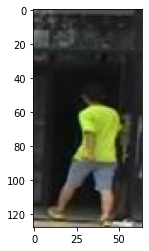

teenager
no backpack
no bag
no handbag
pants
short
short sleeve
short hair
no hat
male
no upblack
no upwhite
no upred
no uppurle
no upyellow
no upgray
no upblue
yes upgreen
no downblack
no downwhite
no downpink
no downpurple
no downyellow
no downgray
yes downblue
no downgreen
no downbrown
no upmulti-color
no downmulti-color


In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler

k_folds = 5

kfold = KFold(n_splits=k_folds, shuffle=True)

for train_ids, test_ids in kfold.split(training_data):
  train_sampler = SubsetRandomSampler(train_ids)
  test_sampler = SubsetRandomSampler(test_ids)

  trainloader = torch.utils.data.DataLoader(training_data, batch_size=10, sampler=train_sampler)
  testloader = torch.utils.data.DataLoader(training_data, batch_size=10, sampler=test_sampler)

  # print one sample for the train and the test

  train_features, train_ids, train_labels = next(iter(trainloader))
  print(f"Feature batch shape: {train_features.size()}")
  print(f"Labels batch shape: {train_labels.size()}")
  img = train_features[0]
  label = train_labels[0].squeeze()
  plt.imshow(img.permute(1, 2, 0))
  plt.show()
  for i in range(len(label)):
    print(labels_map[i][label[i].item()])

  train_features, train_ids, train_labels = next(iter(testloader))
  print(f"Feature batch shape: {train_features.size()}")
  print(f"Labels batch shape: {train_labels.size()}")
  img = train_features[0]
  label = train_labels[0].squeeze()
  plt.imshow(img.permute(1, 2, 0))
  plt.show()
  for i in range(len(label)):
    print(labels_map[i][label[i].item()])

  break